# 📊 Sales Performance Insights

## 🎯 Overview
This project analyzes synthetic sales data to uncover trends in product, region, and salesperson performance.

---

## 🔍 Key Findings

- **Top-performing Product**: Tablet
- **Strongest Region**: An interesting insight is that revenue is equally distributed amongst regions, with each of the four regions contributing to around ~25% of total revenue.
- **Highest Revenue Month**: February
- **Top-performing Salesperson**: Sophia

---

## 🛠️ Tools Used
- SQLite (via Python in Google Colab)
- Pandas
- Matplotlib
- Markdown for documentation

---

## 📌 Next Steps
- Expand analysis to include returns and customer churn.
- Use dashboard tools (e.g., Tableau, Power BI) for dynamic insights.


In [ ]:
import pandas as pd
import sqlite3

# Load CSV file into a DataFrame
df = pd.read_csv('/content/sales_data_v2.csv')

# Create an in-memory SQLite DB and upload the data
conn = sqlite3.connect(':memory:')
df.to_sql('sales', conn, index=False, if_exists='replace')

# Preview the first 5 rows
df.head()


,order_id,order_date,product_name,quantity,price,salesperson,region
0,1,2024-04-04,Mouse,9,239.69,Emma,East
1,2,2024-06-14,Smartphone,1,668.36,Sophia,East
2,3,2024-05-29,Smartphone,4,96.30,Emma,East
3,4,2024-03-04,Laptop,2,642.00,Michael,North
4,5,2024-05-07,Tablet,3,1340.04,Olivia,South


In [ ]:
# Total revenue per product
query = """
SELECT product_name, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product_name
ORDER BY total_revenue DESC;
"""
pd.read_sql(query, conn)


,product_name,total_revenue
0,Tablet,97545.05
1,Smartphone,70199.12
2,Mouse,67628.65
3,Laptop,66373.18
4,Headphones,51544.61
5,Keyboard,44325.20
6,Monitor,39009.73
7,Smartwatch,16114.45


In [ ]:
pd.read_sql("""
SELECT region, SUM(quantity * price) AS total_sales
FROM sales
GROUP BY region
ORDER BY total_sales DESC;
""", conn)


,region,total_sales
0,South,120528.85
1,East,116448.17
2,North,108759.07
3,West,107003.90


In [ ]:
pd.read_sql("""
SELECT strftime('%Y-%m', order_date) AS month, SUM(quantity * price) AS total_sales
FROM sales
GROUP BY month
ORDER BY month;
""", conn)


,month,total_sales
0,2024-01,37099.38
1,2024-02,120834.45
2,2024-03,87601.06
3,2024-04,97962.61
4,2024-05,79212.76
5,2024-06,30029.73


In [ ]:
pd.read_sql("""
SELECT salesperson, SUM(quantity * price) AS total_sales
FROM sales
GROUP BY salesperson
ORDER BY total_sales DESC;
""", conn)


,salesperson,total_sales
0,Sophia,83082.36
1,David,77582.20
2,Olivia,77514.29
3,Alice,69238.11
4,John,47159.42
5,Michael,46797.48
6,Robert,28660.20
7,Emma,22705.93


from matplotlib import pyplot as plt
_df_0['total_sales'].plot(kind='hist', bins=20, title='total_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('salesperson').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['total_sales'].plot(kind='line', figsize=(8, 4), title='total_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['salesperson'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='total_sales', y='salesperson', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

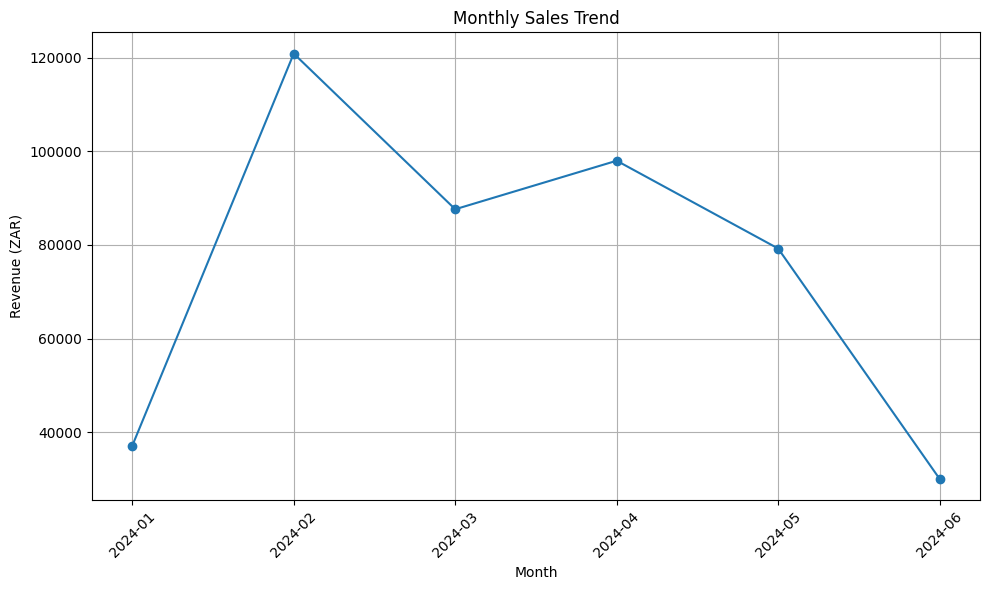

In [ ]:
import matplotlib.pyplot as plt

# Monthly trend query
monthly = pd.read_sql("""
SELECT strftime('%Y-%m', order_date) AS month, SUM(quantity * price) AS total_sales
FROM sales
GROUP BY month
ORDER BY month;
""", conn)

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly['month'], monthly['total_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (ZAR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


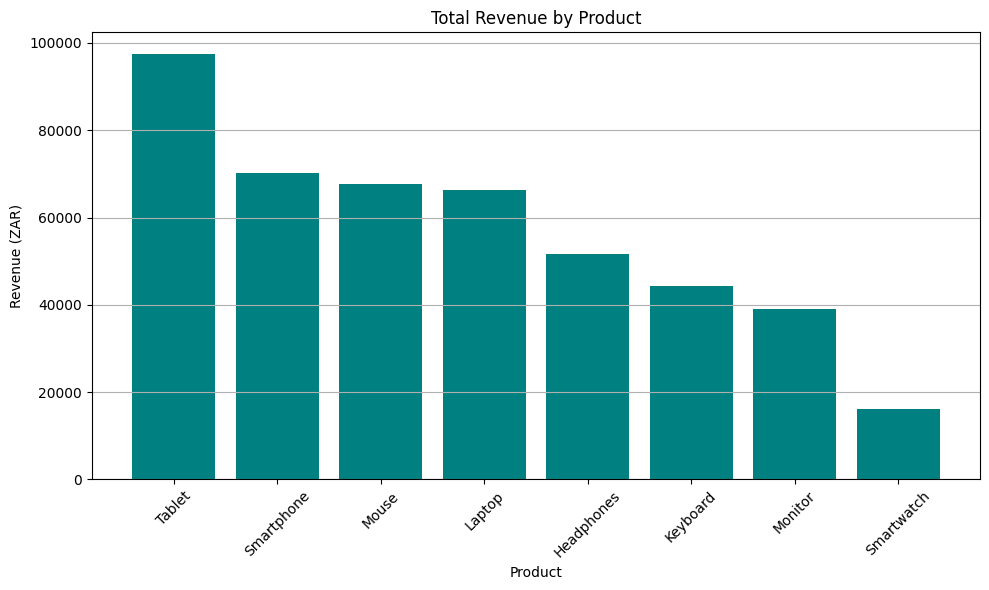

In [ ]:
# Revenue by product
product_rev = pd.read_sql("""
SELECT product_name, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product_name
ORDER BY total_revenue DESC;
""", conn)

# Plot
plt.figure(figsize=(10,6))
plt.bar(product_rev['product_name'], product_rev['total_revenue'], color='teal')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (ZAR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


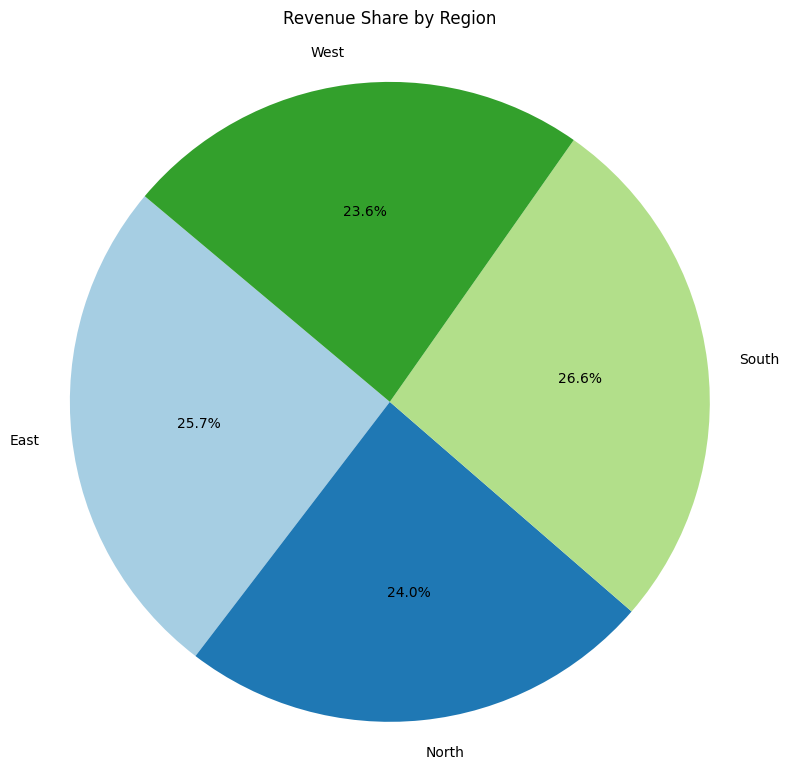

In [ ]:
# Revenue by region
region_rev = pd.read_sql("""
SELECT region, SUM(quantity * price) AS total_sales
FROM sales
GROUP BY region;
""", conn)

# Plot
plt.figure(figsize=(8,8))
plt.pie(region_rev['total_sales'], labels=region_rev['region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Revenue Share by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()


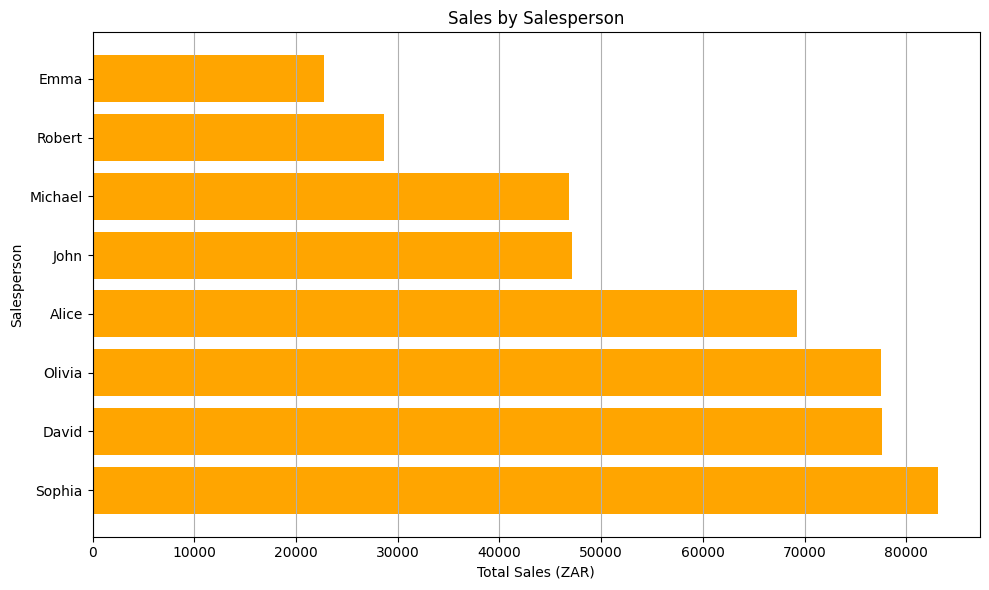

In [ ]:
# Revenue by salesperson
salesperson_rev = pd.read_sql("""
SELECT salesperson, SUM(quantity * price) AS total_sales
FROM sales
GROUP BY salesperson
ORDER BY total_sales DESC;
""", conn)

# Plot
plt.figure(figsize=(10,6))
plt.barh(salesperson_rev['salesperson'], salesperson_rev['total_sales'], color='orange')
plt.title('Sales by Salesperson')
plt.xlabel('Total Sales (ZAR)')
plt.ylabel('Salesperson')
plt.grid(axis='x')
plt.tight_layout()
plt.show()
